## Task 6 - Prediction Using Decision Tree Algorithm

### Name : Manju Vijayakumar
### Batch: GRIP JUNE 2023

In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the dataset

data = pd.read_csv('/content/sample_data/Iris_clustering.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Basic Exploratory Data Analysis

In [ ]:

# Shape of the dataset
print('Dataset has', data.shape[0], 'rows and ', data.shape[1], ' columns')

Dataset has 150 rows and  6  columns


In [ ]:
# Datatype detail

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Duplicate row count

print('No of duplicate rows:', data.duplicated().sum())

No of duplicate rows: 0


In [ ]:
# Null value check

data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Insights - No NULL values, No duplicate rows, Dataset has 150 rows with 5 columns**

In [ ]:
# 
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Insights - There exists 50 samples of species Iris-setosa, Iris-versicolor and Iris-viriginica**

In [ ]:
# Checking the Id column

data.Id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150])

**Variable Id is for unique identification of rows and can be dropped**

In [ ]:
# Copy of original dataset
data_original = data.copy()

# Dropping Id column
data = data.drop(['Id'], axis = 1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Univariate and Multivariate Analysis

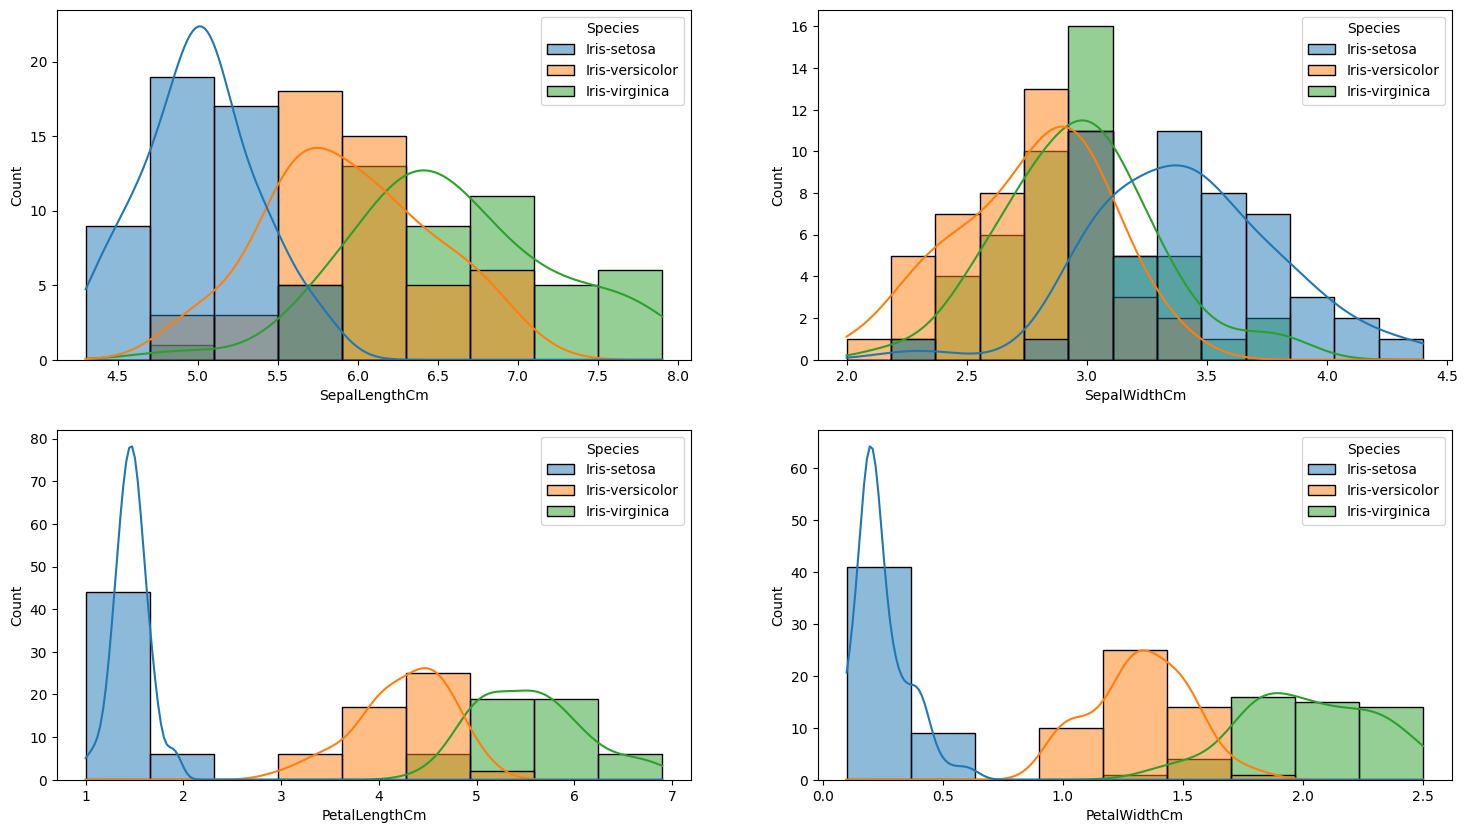

In [ ]:
# Checking the distribution
fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(18, 10)
sns.histplot(x = data.SepalLengthCm, kde = True, hue = data.Species, ax = ax[0][0])
sns.histplot(x = data.SepalWidthCm, kde = True, hue = data.Species, ax = ax[0][1])
sns.histplot(x = data.PetalLengthCm, kde = True, hue = data.Species, ax = ax[1][0])
sns.histplot(x = data.PetalWidthCm, kde = True, hue = data.Species, ax = ax[1][1])
plt.show()

In [ ]:
# Statistical summary of the dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


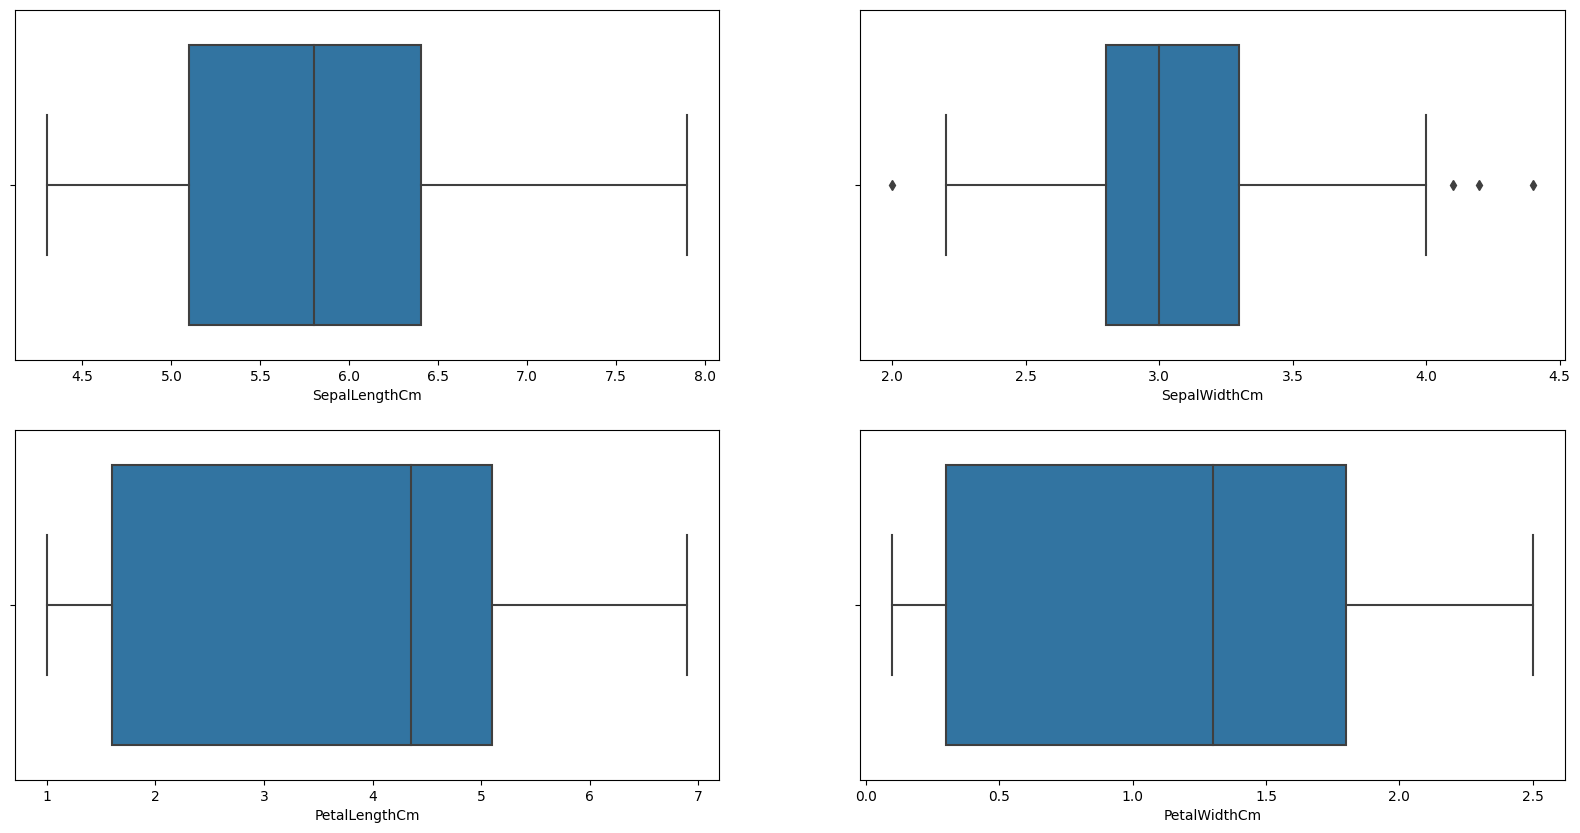

In [ ]:
# Outlier analysis using Boxplots

fig, ax = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(20, 10)
sns.boxplot(x = data.SepalLengthCm, hue = data.Species, ax = ax[0][0])
sns.boxplot(x = data.SepalWidthCm, hue = data.Species, ax = ax[0][1])
sns.boxplot(x = data.PetalLengthCm, hue = data.Species, ax = ax[1][0])
sns.boxplot(x = data.PetalWidthCm, hue = data.Species, ax = ax[1][1])
plt.show()

**SepalWidthCm have a few outliers. Other variables does not have outliers**

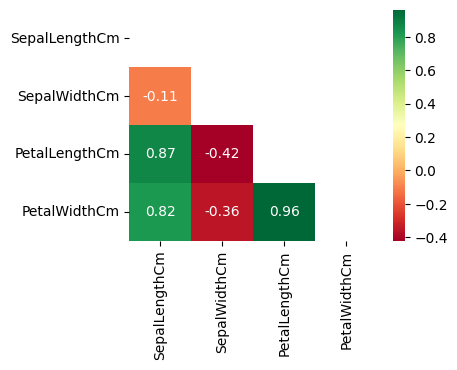

In [ ]:
# Multivariate analysis

plt.figure(figsize = (4, 3)) 
corr = data.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot = True, fmt = '0.2f', cmap = 'RdYlGn', mask = mask)
plt.show()

**Insights - Obviously a strong positive correlation shared by variable PetalLengthCm and PetalWidthCm (96%) whereas negative correlation betweeen SepalWidthCm and SepalLengthCm (-0.11)**

# Decision Tree Classifier

In [ ]:
# Importing necessary libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Converting Target column, Species to numerical before training the dataset

data.Species = pd.Categorical(data.Species).codes

print(data_original.Species.value_counts())
print(data.Species.value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64
0    50
1    50
2    50
Name: Species, dtype: int64


In [ ]:

X = data.drop('Species', axis = 1)

y = data.pop('Species')

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
# Regularizing the decision tree

param_grid = {
              'criterion' : ['gini', 'entropy'],
              'max_depth': [3, 4, 5]
              }

In [ ]:
from sklearn.model_selection import GridSearchCV

dt_model_reg = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model_reg, param_grid = param_grid, cv = 3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5]})

In [ ]:
grid_search.best_params_



{'criterion': 'gini', 'max_depth': 3}

In [ ]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.9809523809523809
0.9555555555555556


In [ ]:
# Visualize the Decision Tree

from sklearn.tree import export_graphviz

In [ ]:
# Export as dot file

target_names = ['setosa', 'versicolor', 'virginica']

export_graphviz(dt_model, out_file = 'tree.dot', feature_names = list(X_train), class_names = target_names,
                rounded = True, proportion = False, precision =2, filled = True)

In [ ]:
# Convert to png

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

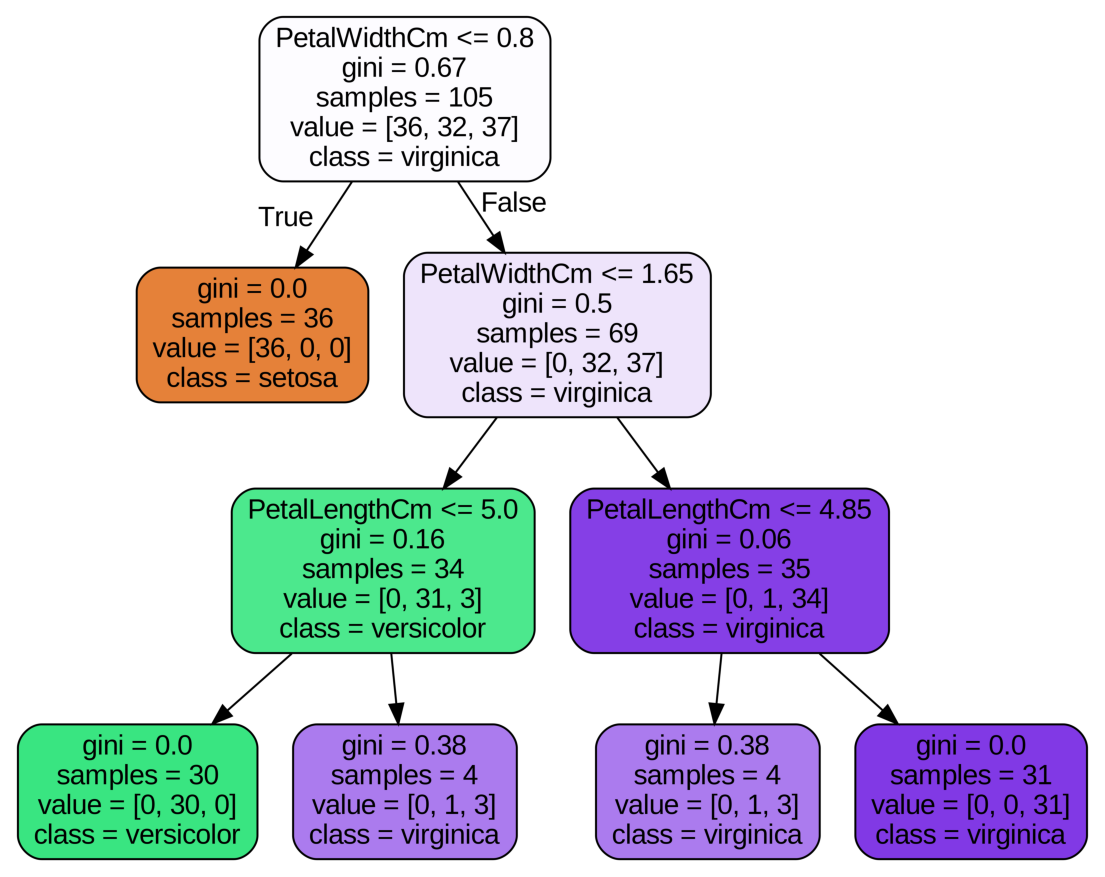

In [ ]:
# To display

plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off')
plt.show()


**Insights - From the distribution we visualized class Setosa has specific distribution of itself. Hence it got classified in the first level itself. Class Virginica and Versicolor got classified in later levels.**

##Thank You